<a href="https://colab.research.google.com/github/Sreelakshmiamenon/Machine-learning-projects/blob/main/29_Wine_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/wine-clustering.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [ ]:
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [ ]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [ ]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


Since here the data is small, there is no need for separating x and y for training and testing datas.

In [ ]:
x=df.iloc[:,::]
x

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
#Calculate the elbow point
from sklearn.cluster import KMeans
wcss=[]     #to append variance
for i in range(1,11):   #i act as no of clusters
  data=KMeans(n_clusters=i,init='k-means++',random_state=42)
  data.fit(x)
  wcss.append(data.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
print(wcss)

[17592296.383508474, 4543749.614531861, 2370689.686782969, 1337029.49294159, 916379.1871539169, 647326.0020260848, 412303.8282508012, 323223.24705426686, 270954.9292415376, 217887.37856033302]


Text(0.5, 1.0, 'Elbow point evaluation')

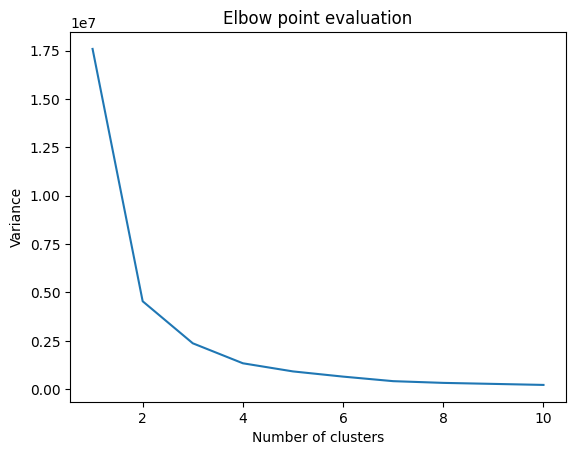

In [ ]:
plt.plot(range(1,11),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Variance')
plt.title('Elbow point evaluation')

In [ ]:
model=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_means=model.fit_predict(x)
y_means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 3, 3, 2, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 2, 2,
       1, 1, 1, 2, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       1, 2], dtype=int32)

In [ ]:
x['cluster']=y_means
x

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y_means,test_size=0.30,random_state=42)
x_train

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
138,13.49,3.59,2.19,19.5,88,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580,2
104,12.51,1.73,1.98,20.5,85,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672,2
78,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750,2
36,13.28,1.64,2.84,15.5,110,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880,1
93,12.29,2.83,2.22,18.0,88,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410,0
106,12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510,0
14,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547,3
92,12.69,1.53,2.26,20.7,80,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495,0


In [ ]:
x_test

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
19,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.100000,0.96,3.36,845,1
45,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.240000,0.87,3.33,1080,1
140,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.600000,0.77,2.31,600,2
30,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.700000,1.19,2.71,1285,3
67,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.680000,1.12,3.48,510,0
16,14.30,1.92,2.72,20.0,120,2.80,3.14,0.33,1.97,6.200000,1.07,2.65,1280,3
119,12.00,3.43,2.00,19.0,87,2.00,1.64,0.37,1.87,1.280000,0.93,3.05,564,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750,2
109,11.61,1.35,2.70,20.0,94,2.74,2.92,0.29,2.49,2.650000,0.96,3.26,680,2
141,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.600000,0.70,2.47,780,2


In [ ]:
y_train

array([2, 2, 2, 1, 0, 1, 0, 0, 2, 2, 3, 3, 3, 1, 2, 1, 1, 0, 0, 3, 2, 0,
       1, 0, 0, 0, 1, 2, 1, 2, 0, 2, 1, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 1,
       0, 2, 2, 0, 1, 3, 0, 2, 2, 2, 1, 2, 0, 0, 3, 3, 0, 3, 0, 3, 1, 0,
       0, 1, 1, 3, 0, 2, 1, 2, 2, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 1, 0, 2,
       2, 2, 2, 0, 1, 0, 1, 1, 3, 1, 2, 2, 3, 2, 2, 1, 1, 2, 1, 3, 0, 2,
       0, 0, 0, 0, 2, 1, 0, 2, 2, 0, 0, 3, 0, 0], dtype=int32)

In [ ]:
y_test

array([1, 1, 2, 3, 0, 3, 2, 2, 2, 2, 1, 0, 1, 0, 3, 0, 0, 2, 1, 0, 3, 0,
       2, 2, 0, 2, 0, 2, 0, 1, 1, 0, 2, 3, 3, 1, 2, 0, 2, 2, 1, 0, 0, 2,
       0, 3, 2, 0, 2, 3, 0, 1, 3, 2], dtype=int32)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[ 0.62844732,  1.08120605, -0.65212742, ..., -1.07090115,
        -0.51821917,  0.75498384],
       [-0.54088231, -0.61299439, -1.42753372, ...,  1.33076844,
        -0.21506322,  0.75498384],
       [-0.75565714, -1.28703113, -1.53830605, ..., -0.39843366,
         0.04196031,  0.75498384],
       ...,
       [ 1.69038953, -0.48547393,  0.04943066, ...,  0.54851034,
         2.66821356,  1.72011783],
       [-0.32610748, -0.79516648, -0.39365865, ..., -0.74152932,
        -0.79830892, -1.17528413],
       [-0.74372521,  0.04282513,  0.34482354, ...,  1.07001574,
        -0.98613381, -1.17528413]])

In [ ]:
x_test

array([[ 8.07426344e-01,  6.34884427e-01,  7.14064633e-01,
        -1.23917300e+00,  9.87957814e-01,  6.55322163e-01,
         1.01578048e+00, -1.54004746e+00,  1.15684915e-01,
         5.78114131e-02,  2.90968755e-03,  1.04256809e+00,
         3.55001792e-01, -2.10150142e-01],
       [ 1.48754664e+00,  1.49109325e+00,  2.70975320e-01,
        -1.72907860e-01,  6.61273097e-01,  8.85694346e-01,
         6.38337246e-01, -5.09085455e-01, -5.92067322e-01,
         1.22062766e-01, -3.83663087e-01,  1.00139661e+00,
         1.12936755e+00, -2.10150142e-01],
       [-3.97410416e-02,  3.70734895e-01,  1.23100217e+00,
         4.32269651e-01, -3.18781055e-01, -1.12622272e+00,
        -1.49719682e+00,  1.31492424e+00, -1.45517981e+00,
        -1.71657704e-01, -8.13188392e-01, -3.98433663e-01,
        -4.52315705e-01,  7.54983845e-01],
       [ 9.14813759e-01, -8.22492297e-01,  1.23100217e+00,
         8.64539302e-01,  7.90366251e-03,  1.11606653e+00,
         1.23430024e+00, -5.88390224e-01,  1.

In [ ]:
from sklearn.naive_bayes import GaussianNB  #Using naive bayes
data=GaussianNB()
data.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred=data.predict(x_test)
y_pred

array([1, 1, 2, 3, 0, 3, 2, 2, 2, 2, 1, 0, 1, 0, 3, 0, 0, 2, 1, 0, 3, 0,
       2, 2, 0, 2, 0, 2, 0, 1, 1, 0, 2, 3, 3, 1, 2, 0, 2, 2, 1, 0, 0, 2,
       0, 3, 2, 0, 2, 3, 0, 1, 3, 2], dtype=int32)

In [ ]:
y_test

array([1, 1, 2, 3, 0, 3, 2, 2, 2, 2, 1, 0, 1, 0, 3, 0, 0, 2, 1, 0, 3, 0,
       2, 2, 0, 2, 0, 2, 0, 1, 1, 0, 2, 3, 3, 1, 2, 0, 2, 2, 1, 0, 0, 2,
       0, 3, 2, 0, 2, 3, 0, 1, 3, 2], dtype=int32)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
mat=confusion_matrix(y_test,y_pred)
mat

array([[17,  0,  0,  0],
       [ 0, 10,  0,  0],
       [ 0,  0, 18,  0],
       [ 0,  0,  0,  9]])

In [ ]:
score=accuracy_score(y_test,y_pred)
score

1.0

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00         9

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

